# 1.  Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import requests
import re
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython.display import Image
warnings.filterwarnings("ignore")

In [2]:
# Install tweepy library
#!conda install -c conda-forge tweepy

# 2. Gather Data

In [3]:
df = pd.read_csv('twitter-archive-enhanced-2.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# # download file from url
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url=url, auth=('user','pass'))

# # save file locally
# with open(url.split('/')[-1], 'wb') as output:
#     output.write(response.content)

image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.Unauthorized as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
# file = open('tweet-json.txt', 'r')
tweet_list = []
with open('tweet-json.txt', 'r') as fp:
    file = fp.readlines()
for line in file:
    try:
        tweet_list.append(json.loads(line))
    except:
        continue

# file.close()
tweets_df = pd.DataFrame()
tweets_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweets_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweets_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))
tweets_df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_list))
tweets_df['full_text'] = list(map(lambda tweet: tweet['full_text'], tweet_list))
tweets_df.head()

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


# 3. Assess Data

### 3.1 VIsual Assessment

<AxesSubplot:>

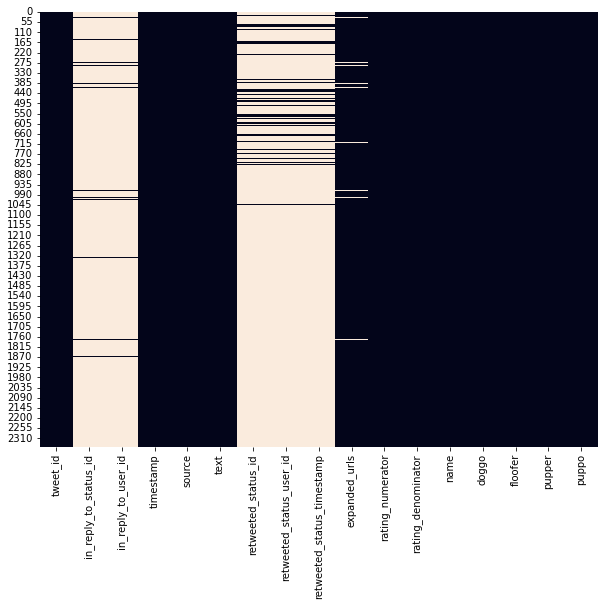

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

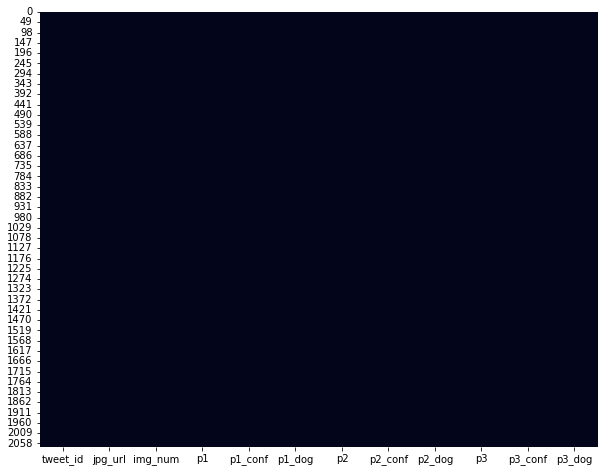

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(image_df.isnull(), cbar=False)

<AxesSubplot:>

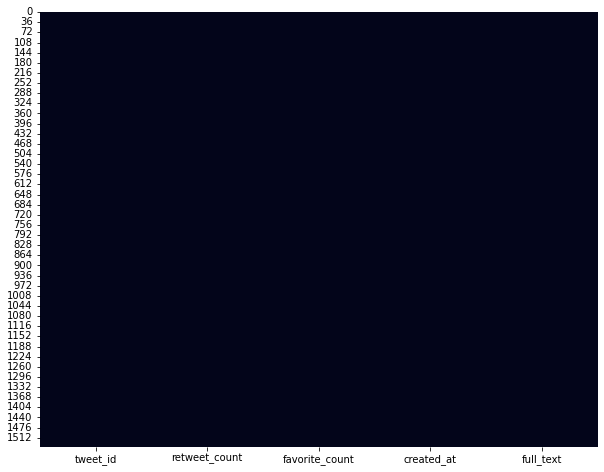

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(tweets_df.isnull(), cbar=False)

### 3.2 Programatic assesment

#### WeRateDogs Twitter archive Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df.shape

(2356, 17)

In [12]:
df.describe(include='object')

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [13]:
# Check for duplicates
df.duplicated().sum()

0

In [14]:
df.source.value_counts(normalize=True)*100

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     94.269949
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         3.862479
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      1.400679
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>     0.466893
Name: source, dtype: float64

In [15]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [16]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [17]:
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
df.floofer.value_counts(normalize=True)*100

None       99.575552
floofer     0.424448
Name: floofer, dtype: float64

In [19]:
df.doggo.value_counts(normalize=True)*100

None     95.882852
doggo     4.117148
Name: doggo, dtype: float64

In [20]:
df.pupper.value_counts(normalize=True)*100

None      89.091681
pupper    10.908319
Name: pupper, dtype: float64

In [21]:
df.puppo.value_counts(normalize=True)*100

None     98.726655
puppo     1.273345
Name: puppo, dtype: float64

#### Image Predictions Dataset

In [22]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_df.shape

(2075, 12)

In [24]:
image_df.describe(include='object')

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


In [25]:
image_df[image_df['jpg_url'] == 'https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


In [26]:
# Check for duplicates
image_df.duplicated().sum()

0

In [27]:
image_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [28]:
image_df.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [29]:
image_df.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [30]:
image_df.p1_dog.value_counts(normalize=True)*100

True     73.831325
False    26.168675
Name: p1_dog, dtype: float64

In [31]:
image_df.p2_dog.value_counts(normalize=True)*100

True     74.843373
False    25.156627
Name: p2_dog, dtype: float64

In [32]:
image_df.p3_dog.value_counts(normalize=True)*100

True     72.240964
False    27.759036
Name: p3_dog, dtype: float64

In [33]:
image_df.img_num.value_counts(normalize=True)*100

1    85.783133
2     9.542169
3     3.180723
4     1.493976
Name: img_num, dtype: float64

#### Tweet API dataset

In [34]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1545 non-null   int64 
 1   retweet_count   1545 non-null   int64 
 2   favorite_count  1545 non-null   int64 
 3   created_at      1545 non-null   object
 4   full_text       1545 non-null   object
dtypes: int64(3), object(2)
memory usage: 60.5+ KB


In [35]:
# Check shape of data
tweets_df.shape

(1545, 5)

In [36]:
tweets_df.tweet_id.duplicated().sum()

0

In [37]:
# Check for duplicates
tweets_df.duplicated().sum()

0

# 3. Issues

*Quality Issues list*

- timestamp, retweeted_status_timestamp column type should be date instead of object

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id data types should be int instead of float

- tweet_id: The current type is int64, I will convert it to string since there is no calculation required.

- created_at: The current type is object (str) rather than datetime. I will change it to datetime.

- source column includes html tags, these tags should be stripped.

- Names column should be cleaned, there is invalid records like a, the, an, the, very, and unacceptable which start with lowercase.

- p1, p2, p3 columns should be standardized "-" expression should be removed.

- for the archive data, retweeted data indicates duplicated tweets.

- some value of rating_numerator is over the scale and rating_denominator is greater than 10, normalize this.

- drop the following columns `in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id', 'rating_numerator', 'rating_denominator'`




*Tidiness Issues list*

- joining all tables.
- creating final dog prediction (with doggo, floofer, pupper, puppo in one column) column.

# 4. Cleaning

### Issue1

timestamp,retweeted_status_timestamp column type should be date instead of object

#### Define:

In [38]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Code:

In [39]:
df_copy.timestamp = pd.to_datetime(df_copy.timestamp)
df_copy.retweeted_status_timestamp = pd.to_datetime(df_copy.retweeted_status_timestamp)

#### Test:

In [40]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue2

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id data types should be int instead of float

#### Data:

In [41]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Code:

In [42]:
df_copy.in_reply_to_status_id = df_copy.in_reply_to_status_id.astype('int', errors='ignore')
df_copy.in_reply_to_user_id = df_copy.in_reply_to_user_id.astype('int', errors='ignore')
df_copy.retweeted_status_id = df_copy.retweeted_status_id.astype('int', errors='ignore')
df_copy.retweeted_status_user_id = df_copy.retweeted_status_user_id.astype('int', errors='ignore')

#### Test:

In [43]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue3

tweet_id: The current type is int64, I will convert it to string since there is no calculation required.

#### Data:

In [44]:
image_df_copy = image_df.copy()
tweets_df_copy = tweets_df.copy()
print("tweet_id data type for the 3 dataset")
print(f"archive data: {df_copy.tweet_id.dtype}")
print(f"image data: {image_df_copy.tweet_id.dtype}")
print(f"tweets data: {tweets_df_copy.tweet_id.dtype}")

tweet_id data type for the 3 dataset
archive data: int64
image data: int64
tweets data: int64


#### Code:

In [45]:
df_copy.tweet_id = df_copy.tweet_id.astype("str")
image_df_copy.tweet_id = image_df_copy.tweet_id.astype("str")
tweets_df_copy.tweet_id = tweets_df_copy.tweet_id.astype("str")

#### Test:

In [46]:
print(f"archive data: {df_copy.tweet_id.dtype}")
print(f"image data: {image_df_copy.tweet_id.dtype}")
print(f"tweets data: {tweets_df_copy.tweet_id.dtype}")

archive data: object
image data: object
tweets data: object


### Issue4

created_at: The current type is object (str) rather than datetime. I will change it to datetime.

#### Data:

In [47]:
tweets_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1545 non-null   object
 1   retweet_count   1545 non-null   int64 
 2   favorite_count  1545 non-null   int64 
 3   created_at      1545 non-null   object
 4   full_text       1545 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.5+ KB


#### Code:

In [48]:
tweets_df_copy.created_at = pd.to_datetime(tweets_df_copy.created_at)

#### Test:

In [49]:
tweets_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1545 non-null   object             
 1   retweet_count   1545 non-null   int64              
 2   favorite_count  1545 non-null   int64              
 3   created_at      1545 non-null   datetime64[ns, UTC]
 4   full_text       1545 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 60.5+ KB


### Issue5
#### Data:

### Issue6

source column includes html tags, these tags should be stripped.

#### Data:

In [50]:
# Display the values in the source column

df_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Code:

In [51]:
# Create regex to extract the string between the tags: <a> </a>
df_copy['source'] = df_copy.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', expand = True)[4];

# Change source to category

df_copy['source'] = df_copy['source'].astype('category')

#### Test:

In [52]:
df_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue7

Names column should be cleaned, there is invalid records like a, the, an, the , very, unacceptable which is start with lowercase.

#### Data:

In [53]:
# set max_colwidth of cell pandas dataframe to show full dataframe
pd.set_option('display.max_colwidth', -1)

combine = pd.merge(df_copy, tweets_df_copy, how='inner', on=['tweet_id'])
combine[combine['name'].str.islower()][['tweet_id','full_text','name']]

,tweet_id,full_text,name
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
55,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
117,869988702071779329,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
168,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
192,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
334,832645525019123713,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
368,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
541,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
648,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
681,788552643979468800,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,mad


#### Code:

In [54]:
# To clean the name column, I will do the following:
#   - create 3 lists and assign tweet_ids to each list based on the following criteria:
#       - a list where the name starts with lower case and the `full_text` column converted to lowercase contains 'named'
#       - a list where the name starts with lower case and the `full_text` column converted to lowercase contains 'name is'
#       - a list where the `name` column converted to lowercase only
#   - loop through the data frame and asign the text to name
#   - index the dataframe and assign the value of the string to the `name` column

lowercase_named = combine.loc[(combine['name'].str.islower()) & (combine['full_text'].str.contains('named'))]['tweet_id'].tolist()

lowercase_name_is = combine.loc[(combine['name'].str.islower()) & (combine['full_text'].str.contains('name is'))]['tweet_id'].tolist()


lowercase = combine.loc[(combine['name'].str.islower())]['tweet_id'].tolist()


print(lowercase_name_is)
print('\n')
print(lowercase_named)
print('\n')
print(lowercase)
for twt in lowercase_name_is:
    text = combine.full_text[combine.tweet_id == twt].iloc[0]
    combine.loc[combine.tweet_id == twt,'name'] = re.findall("name is\s(\w+)", text)


for twt in lowercase_named:
    text = combine.full_text[combine.tweet_id == twt].iloc[0]
    combine.loc[combine.tweet_id == twt,'name'] = re.findall(r"named\s(\w+)", text)    


for twt in lowercase:
    text = combine.full_text[combine.tweet_id == twt].iloc[0]
    combine.loc[combine.tweet_id == twt,'name'] = "None"

['765395769549590528']


[]


['887517139158093824', '881536004380872706', '869988702071779329', '859196978902773760', '855459453768019968', '832645525019123713', '828650029636317184', '806219024703037440', '792913359805018113', '788552643979468800', '778396591732486144', '776249906839351296', '772581559778025472', '770655142660169732', '770093767776997377', '765395769549590528', '755206590534418437', '748977405889503236', '748692773788876800', '748575535303884801', '747885874273214464', '747816857231626240', '746872823977771008', '746369468511756288', '745422732645535745', '744223424764059648', '743222593470234624', '741067306818797568', '740214038584557568', '736392552031657984', '736225175608430592', '731156023742988288', '730924654643314689', '728035342121635841', '717537687239008257', '715758151270801409', '715733265223708672', '710272297844797440', '704859558691414016', '704054845121142784', '703079050210877440', '703041949650034688', '702539513671897089', '700864154249383937', '

#### Test:

In [55]:
combine.name.value_counts()

None       493
Lucy       10 
Charlie    10 
Cooper     10 
Oliver     10 
           .. 
Hunter     1  
Sam        1  
Craig      1  
Augie      1  
Ricky      1  
Name: name, Length: 672, dtype: int64

### Issue8

p1, p2, p3 columns should be standardized as all lowercase and "-" expression should be removed.

#### Data:

In [56]:
# View the columns before the change

image_df_copy[['p1','p2','p3']].head(10)

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,Tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


#### Code:

In [57]:
# Replace _ with space

image_df_copy['p3'] = image_df_copy.p3.str.replace('_',' ')
image_df_copy['p1'] = image_df_copy.p1.str.replace('_',' ')
image_df_copy['p2'] = image_df_copy.p2.str.replace('_',' ')

# Capitalize the content (every word) using title

image_df_copy['p2'] = image_df_copy.p2.str.title()
image_df_copy['p3'] = image_df_copy.p3.str.title()
image_df_copy['p1'] = image_df_copy.p1.str.title()

#### Test:

In [58]:
col = ['p1', 'p2', 'p3']
image_df_copy[col].head(10)

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


### Issue9

for the archive data, retweeted data indicates duplicated tweets.

#### Data:

In [59]:
#check for retweets and duplicates
df_copy[~(df_copy.retweeted_status_id.isnull())].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
230,847978865427394560,NaN,NaN,2017-04-01 01:08:10+00:00,Twitter for iPhone,RT @dog_rates: This is Charlie. He fell asleep on a heating vent. Would puppreciate your assistance. 11/10 someone help Charlie https://t.c…,8.323699e+17,4.196984e+09,2017-02-16 23:23:38+00:00,https://twitter.com/dog_rates/status/832369877331693569/photo/1,11,10,Charlie,None,None,None,None
634,793614319594401792,NaN,NaN,2016-11-02 00:42:53+00:00,Twitter for iPhone,RT @dog_rates: When she says you're a good boy and you know you're a good boy because you're a good boy. 13/10 https://t.co/O5IUmRHRIh,7.916723e+17,4.196984e+09,2016-10-27 16:06:04+00:00,"https://twitter.com/dog_rates/status/791672322847637504/photo/1,https://twitter.com/dog_rates/status/791672322847637504/photo/1",13,10,None,None,None,None,None
357,830173239259324417,NaN,NaN,2017-02-10 21:54:58+00:00,Twitter for iPhone,RT @dog_rates: This is Kyro. He's a Stratocumulus Flop. Tongue ejects at random. Serious h*ckin condition. Still 12/10 would pet passionate…,8.092201e+17,4.196984e+09,2016-12-15 02:14:29+00:00,"https://twitter.com/dog_rates/status/809220051211603969/photo/1,https://twitter.com/dog_rates/status/809220051211603969/photo/1",12,10,Kyro,None,None,None,None
694,786729988674449408,NaN,NaN,2016-10-14 00:47:00+00:00,Twitter for iPhone,RT @dog_rates: This is Oakley. He has no idea what happened here. Even offered to help clean it up. 11/10 such a heckin good boy https://t.…,7.594477e+17,4.196984e+09,2016-07-30 17:56:51+00:00,https://twitter.com/dog_rates/status/759447681597108224/photo/1,11,10,Oakley,None,None,None,None
589,799308762079035393,NaN,NaN,2016-11-17 17:50:33+00:00,Twitter for iPhone,RT @dog_rates: I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC BY HIS OWNER THIS IS SO WILD. 14/10 ULTIMATE LEGEND STATUS https://t.co/7oQ1wpf…,7.743144e+17,4.196984e+09,2016-09-09 18:31:54+00:00,"https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1",14,10,None,None,None,None,None
359,829878982036299777,NaN,NaN,2017-02-10 02:25:42+00:00,Twitter for iPhone,RT @dog_rates: This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR,8.269587e+17,4.196984e+09,2017-02-02 01:01:21+00:00,"https://twitter.com/dog_rates/status/826958653328592898/photo/1,https://twitter.com/dog_rates/status/826958653328592898/photo/1",12,10,Loki,doggo,None,None,None
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59+00:00,Twitter for iPhone,RT @frasercampbell_: oh my... what's that... beautiful scarf around your neck... 14/10 a h*ckin good dog in a h*ckin good game @GoodDogsGam…,8.551225e+17,7.475543e+17,2017-04-20 18:14:33+00:00,https://twitter.com/frasercampbell_/status/855122533267460096/photo/1,14,10,None,None,None,None,None
568,802185808107208704,NaN,NaN,2016-11-25 16:22:55+00:00,Twitter for iPhone,"RT @ChinoChinako: They're good products, Brent\n\nMug holds drinks; hoodie is comfy af. 13/10 \n\nPuppy Aika h*cking agrees. @dog_rates https:/…",8.000650e+17,2.488557e+07,2016-11-19 19:55:41+00:00,"https://twitter.com/ChinoChinako/status/800065028116385792/photo/1,https://twitter.com/ChinoChinako/status/800065028116385792/photo/1,https://twitter.com/ChinoChinako/status/800065028116385792/photo/1",13,10,None,None,None,None,None
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06+00:00,Twitter for iPhone,RT @katieornah: @dog_rates learning a lot at college 12/10 for my professor thank u for the pupper slides https://t.co/nTFDr99hg0,7.710021e+17,1.732729e+09,2016-08-31 15:10:07+00:00,"https://twitter.com/katieornah/status/771002130450743296/photo/1,https://twitter.com/k

In [60]:
#check 1 instance to verify that these retweets are, in fact, duplicates
df_copy[df_copy.text.str.contains('Stephan')][['tweet_id', 'text']]

,tweet_id,text
260,842892208864923648,RT @dog_rates: This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
534,807106840509214720,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
1203,716285507865542656,This is Stephanus. She stays woke. 12/10 https://t.co/WIWabMngQZ


In [61]:
#check that there are duplicates
len(df_copy[~(df_copy.retweeted_status_user_id.isna())])

181

#### Code:

In [62]:
# To remove the retweets
df_copy = df_copy[df_copy.retweeted_status_id.isnull()]
# To remove the replies
df_copy = df_copy[df_copy.in_reply_to_status_id.isnull()]

#### Test:

In [63]:
#check that there are no duplicates
len(df_copy[~(df_copy.retweeted_status_user_id.isna())])

0

### Issue10

most rating_numerator column's is over the scale i.e. denominator is greater than 10, normalize this.

#### Data:

In [64]:
# Rating denominator is not 10
df_copy[df_copy['rating_denominator'] != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


The following tweets ID have wrong ratings:

810984652412424192 _incorrect rating_ = (24/7) _correct rating_ = (NA)[can be represented by 0/0]

740373189193256964 _incorrect rating_ = (9/11) _correct rating_ = (14/10)

722974582966214656 _incorrect rating_ = (4/20) _correct rating_ = (13/10)

716439118184652801 _incorrect rating_ = (50/50) _correct rating_ = (11/10)

682962037429899265 _incorrect rating_ = (7/11) _correct rating_ = (10/10)

666287406224695296 _incorrect rating_ = (1/2) _correct rating_ = (9/10)

*We have 7 ratings corrections to make.*

#### Code:

In [65]:
wrong_ratings_id = {'810984652412424192': [0, 0], '740373189193256964': [14, 10], '722974582966214656': [13, 10], 
                    '716439118184652801': [11, 10], '682962037429899265': [10, 10], '666287406224695296': [9, 10]}

In [66]:
def clean_rating(df, rating_dict):
    for val, arr in rating_dict.items():
        indx = df[df['tweet_id'] == val].index[0]
        df.at[indx, 'rating_numerator'] = arr[0]
        df.at[indx, 'rating_denominator'] = arr[1]
    return df

In [67]:
df_copy = clean_rating(df=df_copy, rating_dict=wrong_ratings_id)

In [68]:
df_copy[df_copy['rating_denominator'] > 10][['tweet_id', 'rating_numerator', 'rating_denominator']].head(10)

,tweet_id,rating_numerator,rating_denominator
433,820690176645140481,84,70
902,758467244762497024,165,150
1120,731156023742988288,204,170
1228,713900603437621249,99,90
1254,710658690886586372,80,80
1274,709198395643068416,45,50
1351,704054845121142784,60,50
1433,697463031882764288,44,40
1635,684222868335505415,121,110
1779,677716515794329600,144,120


In [69]:
for i, row in df_copy.iterrows():
    if(row['rating_numerator'] != 0 and row['rating_denominator'] != 0):
        standardize_numerator = round(10 * (row['rating_numerator']/row['rating_denominator']))
        df_copy.at[i, 'normalized_numerator'] = int(standardize_numerator)
        df_copy.at[i, 'normalized_denominator'] = 10
    else:
        df_copy.at[i, 'normalized_numerator'] = 0
        df_copy.at[i, 'normalized_denominator'] = 10

#### Test:

In [70]:
df_copy[df_copy['rating_denominator'] != 10][['tweet_id', 'rating_numerator', 'rating_denominator', 'normalized_numerator', 'normalized_denominator']]

,tweet_id,rating_numerator,rating_denominator,normalized_numerator,normalized_denominator
433,820690176645140481,84,70,12.0,10.0
516,810984652412424192,0,0,0.0,10.0
902,758467244762497024,165,150,11.0,10.0
1120,731156023742988288,204,170,12.0,10.0
1228,713900603437621249,99,90,11.0,10.0
1254,710658690886586372,80,80,10.0,10.0
1274,709198395643068416,45,50,9.0,10.0
1351,704054845121142784,60,50,12.0,10.0
1433,697463031882764288,44,40,11.0,10.0
1635,684222868335505415,121,110,11.0,10.0


### Issue11

drop columns in archive data

#### Data:

In [71]:
df_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'normalized_numerator', 'normalized_denominator'],
      dtype='object')

#### Code:

In [72]:
df_copy = df_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 
                        'retweeted_status_user_id', 'rating_numerator', 'rating_denominator'], axis=1)

#### Test:

In [73]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                2097 non-null   object             
 1   timestamp               2097 non-null   datetime64[ns, UTC]
 2   source                  2097 non-null   category           
 3   text                    2097 non-null   object             
 4   expanded_urls           2094 non-null   object             
 5   name                    2097 non-null   object             
 6   doggo                   2097 non-null   object             
 7   floofer                 2097 non-null   object             
 8   pupper                  2097 non-null   object             
 9   puppo                   2097 non-null   object             
 10  normalized_numerator    2097 non-null   float64            
 11  normalized_denominator  2097 non-null   flo

In [74]:
image_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [75]:
tweets_df_copy = tweets_df_copy.drop('created_at', axis=1)

In [76]:
tweets_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1545 non-null   object
 1   retweet_count   1545 non-null   int64 
 2   favorite_count  1545 non-null   int64 
 3   full_text       1545 non-null   object
dtypes: int64(2), object(2)
memory usage: 48.4+ KB


### Tidiness
### Issue12
joining all tables

#### Code:

In [77]:
# Merge all 3 data together
full_df = pd.merge(df_copy, image_df_copy, how='inner', on=['tweet_id'])
full_df = pd.merge(full_df, tweets_df_copy, how='inner', on=['tweet_id'])
full_df.to_csv('full_df.csv')
full_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9774,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


In [78]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 1213
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1214 non-null   object             
 1   timestamp               1214 non-null   datetime64[ns, UTC]
 2   source                  1214 non-null   category           
 3   text                    1214 non-null   object             
 4   expanded_urls           1214 non-null   object             
 5   name                    1214 non-null   object             
 6   doggo                   1214 non-null   object             
 7   floofer                 1214 non-null   object             
 8   pupper                  1214 non-null   object             
 9   puppo                   1214 non-null   object             
 10  normalized_numerator    1214 non-null   float64            
 11  normalized_denominator  1214 non-null   flo

In [79]:
full_df.shape

(1214, 26)

### Issue13
creating final dog prediction (with doggo, floofer, pupper, puppor in one column) column.

#### Data:

In [80]:
dog_stage = ['doggo','pupper', 'floofer', 'puppo' ]
full_df[dog_stage].head(30)

,doggo,pupper,floofer,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


#### Code:

In [81]:
# In each dog specie column i.e. doggo, pupper, floofer, puppo, replace None with ''
for i in dog_stage:
        full_df[i] = full_df[i].replace('None', '')

# concatenates the elements of full_df.doggo and elements of other dog specie element-wise
full_df['dog_stage'] = full_df.doggo + full_df.floofer + full_df.pupper + full_df.puppo

# the dog specie columns are dropped
full_df = full_df.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
full_df['dog_stage'] = full_df['dog_stage'].replace('', np.nan)

In [82]:
full_df

,tweet_id,timestamp,source,text,expanded_urls,name,normalized_numerator,normalized_denominator,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,Bagel,0.085851,False,Banana,0.076110,False,8853,39467,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,10.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,10.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9774,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,689599056876867584,2016-01-20 00:03:21+00:00,Twitter for iPhone,Here we see 33 dogs posing for a picture. All get 11/10 for superb cooperation https://t.co/TRAri5iHzd,https://twitter.com/dog_rates/status/689599056876867584/photo/1,None,11.0,10.0,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,1,...,Cocker Spaniel,0.073101,True,Chihuahua,0.070323,True,6265,12795,Here we see 33 dogs posing for a picture. All get 11/10 for superb cooperation https://t.co/TRAri5iHzd,NaN
1210,689557536375177216,2016-01-19 21:18:22+00:00,Twitter for iPhone,Downright majestic af 12/10 https://t.co/WFh2FEbYzj,https://twitter.com/dog_rates/status/689557536375177216/photo/1,None,12.0,10.0,https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg,1,...,Siberian Husky,0.161655,True,Dingo,0.154414,False,519,2257,Downright majestic af 12/10 https://t.co/WFh2FEbYzj,NaN
1211,689517482558820352,2016-01-19 18:39:13+00:00,Twitter for iPhone,This 

#### Test:

In [83]:
full_df['dog_stage'].value_counts()

pupper          109
doggo           63 
puppo           22 
doggopupper     8  
floofer         6  
doggopuppo      1  
doggofloofer    1  
Name: dog_stage, dtype: int64

In [84]:
breed = []

# iterating over full_df row by row and taking the dog breed otherwise np.nan
for i, row in full_df.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
    else:
        breed.append(np.nan)
        
full_df['breed'] = breed

In [85]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 1213
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1214 non-null   object             
 1   timestamp               1214 non-null   datetime64[ns, UTC]
 2   source                  1214 non-null   category           
 3   text                    1214 non-null   object             
 4   expanded_urls           1214 non-null   object             
 5   name                    1214 non-null   object             
 6   normalized_numerator    1214 non-null   float64            
 7   normalized_denominator  1214 non-null   float64            
 8   jpg_url                 1214 non-null   object             
 9   img_num                 1214 non-null   int64              
 10  p1                      1214 non-null   object             
 11  p1_conf                 1214 non-null   flo

In [86]:
full_df.source.value_counts()

Twitter for iPhone     1199
Twitter Web Client     8   
TweetDeck              7   
Vine - Make a Scene    0   
Name: source, dtype: int64

In [87]:
full_df.name.value_counts()

None       266
a          15 
Oliver     9  
Cooper     9  
Charlie    9  
          ..  
Sam        1  
Craig      1  
Augie      1  
Halo       1  
Ricky      1  
Name: name, Length: 664, dtype: int64

In [88]:
# set max_colwidth of cell pandas dataframe to show full dataframe
pd.set_option('display.max_colwidth', -1)


full_df[full_df['name'].str.islower()][['tweet_id','full_text','name']]

,tweet_id,full_text,name
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
49,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
134,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
147,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
272,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
401,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
468,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
578,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
592,770655142660169732,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very
618,765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my


In [89]:
# To clean the name column, I will do the following:
#   - create 3 lists and assign tweet_ids to each list based on the following criteria:
#       - a list where the name starts with lower case and the `full_text` column converted to lowercase contains 'named'
#       - a list where the name starts with lower case and the `full_text` column converted to lowercase contains 'name is'
#       - a list where the `name` column converted to lowercase only
#   - loop through the data frame and asign the text to name
#   - index the dataframe and assign the value of the string to the `name` column

lowercase_named = full_df.loc[(full_df['name'].str.islower()) & (full_df['full_text'].str.contains('named'))]['tweet_id'].tolist()

lowercase_name_is = full_df.loc[(full_df['name'].str.islower()) & (full_df['full_text'].str.contains('name is'))]['tweet_id'].tolist()


lowercase = full_df.loc[(full_df['name'].str.islower())]['tweet_id'].tolist()


print(lowercase_name_is)
print('\n')
print(lowercase_named)
print('\n')
print(lowercase)
for twt in lowercase_name_is:
    text = full_df.full_text[full_df.tweet_id == twt].iloc[0]
    full_df.loc[full_df.tweet_id == twt,'name'] = re.findall("name is\s(\w+)", text)


for twt in lowercase_named:
    text = full_df.full_text[full_df.tweet_id == twt].iloc[0]
    full_df.loc[full_df.tweet_id == twt,'name'] = re.findall(r"named\s(\w+)", text)    


for twt in lowercase:
    text = full_df.full_text[full_df.tweet_id == twt].iloc[0]
    full_df.loc[full_df.tweet_id == twt,'name'] = "None"

['765395769549590528']


[]


['887517139158093824', '881536004380872706', '859196978902773760', '855459453768019968', '828650029636317184', '806219024703037440', '792913359805018113', '772581559778025472', '770655142660169732', '765395769549590528', '755206590534418437', '748977405889503236', '748692773788876800', '748575535303884801', '747885874273214464', '747816857231626240', '746872823977771008', '746369468511756288', '745422732645535745', '743222593470234624', '741067306818797568', '740214038584557568', '736225175608430592', '731156023742988288', '730924654643314689', '728035342121635841', '717537687239008257', '715733265223708672', '710272297844797440', '704859558691414016', '704054845121142784', '703079050210877440', '703041949650034688', '702539513671897089', '700864154249383937', '700747788515020802', '697259378236399616', '695095422348574720', '692187005137076224', '690360449368465409']


In [90]:
full_df.name.value_counts()

None       306
Cooper     9  
Oliver     9  
Lucy       9  
Charlie    9  
          ..  
Craig      1  
Augie      1  
Halo       1  
Moe        1  
Ricky      1  
Name: name, Length: 647, dtype: int64

# 5. Store the cleaned dataset

In [91]:
full_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'normalized_numerator', 'normalized_denominator', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'full_text', 'dog_stage',
       'breed'],
      dtype='object')

In [92]:
# Create a list to re-sort the dataframe columns
sort_cols = ['tweet_id','full_text','name', 'retweet_count', 'favorite_count',
 'source','normalized_numerator', 'normalized_denominator', 'img_num', 
 'breed','expanded_urls', 'jpg_url', 'dog_stage']

full_df = full_df[sort_cols]

In [93]:
full_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')


# 6. Analyze the Cleaned dataset

In [94]:
new_df = pd.read_csv('./twitter_archive_master.csv')
new_df.head()

,tweet_id,full_text,name,retweet_count,favorite_count,source,normalized_numerator,normalized_denominator,img_num,breed,expanded_urls,jpg_url,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,8853,39467,Twitter for iPhone,13.0,10.0,1,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,6514,33819,Twitter for iPhone,13.0,10.0,1,Chihuahua,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,4328,25461,Twitter for iPhone,12.0,10.0,1,Chihuahua,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,8964,42908,Twitter for iPhone,13.0,10.0,1,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,9774,41048,Twitter for iPhone,12.0,10.0,2,Basset,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN


In [95]:
new_df.sample(5)

,tweet_id,full_text,name,retweet_count,favorite_count,source,normalized_numerator,normalized_denominator,img_num,breed,expanded_urls,jpg_url,dog_stage
469,792883833364439040,This is Bailey. She's rather h*ckin hype for Halloween tomorrow. Carved those pupkins herself. 12/10 https://t.co/v17mFm0Ftz,Bailey,4964,12666,Twitter for iPhone,12.0,10.0,3,NaN,"https://twitter.com/dog_rates/status/792883833364439040/photo/1,https://twitter.com/dog_rates/status/792883833364439040/photo/1,https://twitter.com/dog_rates/status/792883833364439040/photo/1,https://twitter.com/dog_rates/status/792883833364439040/photo/1",https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,NaN
505,785872687017132033,Meet Rusty. He appears to be rather h*ckin fluffy. Also downright adorable af. 12/10 would rub my face against his https://t.co/1j9kLGb4wV,Rusty,2130,7489,Twitter for iPhone,12.0,10.0,1,Great Pyrenees,https://twitter.com/dog_rates/status/785872687017132033/video/1,https://pbs.twimg.com/ext_tw_video_thumb/785872596088811520/pu/img/5O-_BgqdFQu_2Bt7.jpg,NaN
819,736365877722001409,This is Rory. He's extremely impatient. 11/10 settle down pupper https://t.co/e3tfXJLi40,Rory,1408,4367,Twitter for iPhone,11.0,10.0,3,NaN,"https://twitter.com/dog_rates/status/736365877722001409/photo/1,https://twitter.com/dog_rates/status/736365877722001409/photo/1,https://twitter.com/dog_rates/status/736365877722001409/photo/1,https://twitter.com/dog_rates/status/736365877722001409/photo/1",https://pbs.twimg.com/media/CjgYyuvWkAAHU8g.jpg,pupper
156,852912242202992640,Meet Benny. He likes being adorable and making fun of you while you're on the trampoline. 12/10 let's help him out\n\nhttps://t.co/aVMjBqAy1x https://t.co/7gx2LksT3U,Benny,2037,9658,Twitter for iPhone,12.0,10.0,1,Great Dane,"https://www.gofundme.com/bennys-medical-bills,https://twitter.com/dog_rates/status/852912242202992640/photo/1,https://twitter.com/dog_rates/status/852912242202992640/photo/1",https://pbs.twimg.com/media/C9YnKK3VoAAxn1E.jpg,NaN
39,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",Bella,10407,46860,Twitter for iPhone,5.0,10.0,1,Golden Retriever,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,NaN


In [96]:
new_df.tail(5)

,tweet_id,full_text,name,retweet_count,favorite_count,source,normalized_numerator,normalized_denominator,img_num,breed,expanded_urls,jpg_url,dog_stage
1209,689599056876867584,Here we see 33 dogs posing for a picture. All get 11/10 for superb cooperation https://t.co/TRAri5iHzd,None,6265,12795,Twitter for iPhone,11.0,10.0,1,NaN,https://twitter.com/dog_rates/status/689599056876867584/photo/1,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,NaN
1210,689557536375177216,Downright majestic af 12/10 https://t.co/WFh2FEbYzj,None,519,2257,Twitter for iPhone,12.0,10.0,1,Eskimo Dog,https://twitter.com/dog_rates/status/689557536375177216/photo/1,https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg,NaN
1211,689517482558820352,This is Carl. He just wants to make sure you're having a good day. 12/10 just a swell pup https://t.co/Wk3XCnmDvm,Carl,1609,3735,Twitter for iPhone,12.0,10.0,1,Pembroke,"https://twitter.com/dog_rates/status/689517482558820352/photo/1,https://twitter.com/dog_rates/status/689517482558820352/photo/1,https://twitter.com/dog_rates/status/689517482558820352/photo/1",https://pbs.twimg.com/media/CZGofjJW0AINjN9.jpg,NaN
1212,689289219123089408,Someone sent me this without any context and every aspect of it is spectacular. 13/10 please enjoy https://t.co/Rxrd4hPmp4,None,1056,2476,Twitter for iPhone,13.0,10.0,1,NaN,https://twitter.com/dog_rates/status/689289219123089408/video/1,https://pbs.twimg.com/ext_tw_video_thumb/689289176076959744/pu/img/hEFkFtmMu_hkTlxK.jpg,NaN
1213,689283819090870273,Say hello to Chipson. He's aerodynamic af. No eyes (devastating). 9/10 would make sure he didn't bump into stuff https://t.co/V62rIva61J,Chipson,1250,3624,Twitter for iPhone,9.0,10.0,1,Scotch Terrier,https://twitter.com/dog_rates/status/689283819090870273/photo/1,https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg,NaN


In [97]:
new_df.shape

(1214, 13)

In [98]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,1214.0,7.744195e+17,5.953304e+16,6.892838e+17,7.179400e+17,7.676277e+17,8.235165e+17,8.924206e+17
retweet_count,1214.0,3.802608e+03,5.378905e+03,1.120000e+02,1.231000e+03,2.296000e+03,4.276000e+03,7.951500e+04
favorite_count,1214.0,1.283530e+04,1.368067e+04,7.320000e+02,4.068250e+03,8.405000e+03,1.702500e+04,1.328100e+05
normalized_numerator,1214.0,1.279160e+01,5.071179e+01,0.000000e+00,1.000000e+01,1.200000e+01,1.200000e+01,1.776000e+03
normalized_denominator,1214.0,1.000000e+01,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
img_num,1214.0,1.294069e+00,6.622660e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00


In [99]:
new_df.describe(include=object).T

,count,unique,top,freq
full_text,1214,1214,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,1
name,1214,647,None,306
source,1214,3,Twitter for iPhone,1199
breed,953,106,Golden Retriever,109
expanded_urls,1214,1214,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1
jpg_url,1214,1214,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
dog_stage,210,7,pupper,109


In [100]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                1214 non-null   int64  
 1   full_text               1214 non-null   object 
 2   name                    1214 non-null   object 
 3   retweet_count           1214 non-null   int64  
 4   favorite_count          1214 non-null   int64  
 5   source                  1214 non-null   object 
 6   normalized_numerator    1214 non-null   float64
 7   normalized_denominator  1214 non-null   float64
 8   img_num                 1214 non-null   int64  
 9   breed                   953 non-null    object 
 10  expanded_urls           1214 non-null   object 
 11  jpg_url                 1214 non-null   object 
 12  dog_stage               210 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 123.4+ KB


In [101]:
new_df.breed.value_counts()

Golden Retriever       109
Pembroke               64 
Labrador Retriever     63 
Chihuahua              40 
Samoyed                32 
                       .. 
Giant Schnauzer        1  
Silky Terrier          1  
Clumber                1  
Miniature Schnauzer    1  
Scotch Terrier         1  
Name: breed, Length: 106, dtype: int64

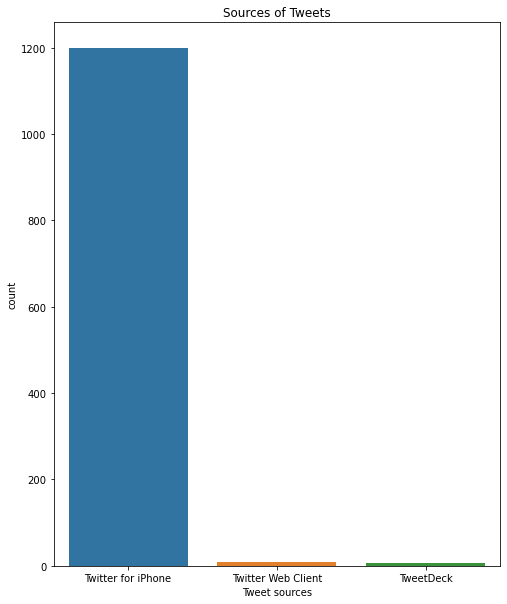

In [102]:
plt.figure(figsize=(8,10))
sns.countplot(x=new_df.source)
plt.xlabel('Tweet sources')
plt.title('Sources of Tweets');

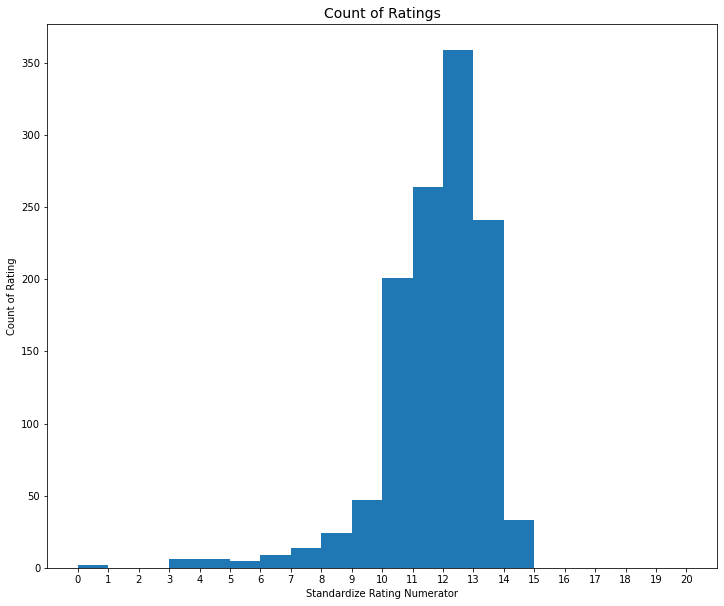

In [103]:
plt.figure(figsize=(12,10))
plt.hist(new_df.normalized_numerator, bins=np.arange(0, 21, step=1));
plt.xticks(np.arange(0, 21, step=1));
plt.title('Count of Ratings', fontsize=14);
plt.xlabel('Standardize Rating Numerator');
plt.ylabel('Count of Rating');

In [104]:
new_df.breed.value_counts().head(5)

Golden Retriever      109
Pembroke              64 
Labrador Retriever    63 
Chihuahua             40 
Samoyed               32 
Name: breed, dtype: int64

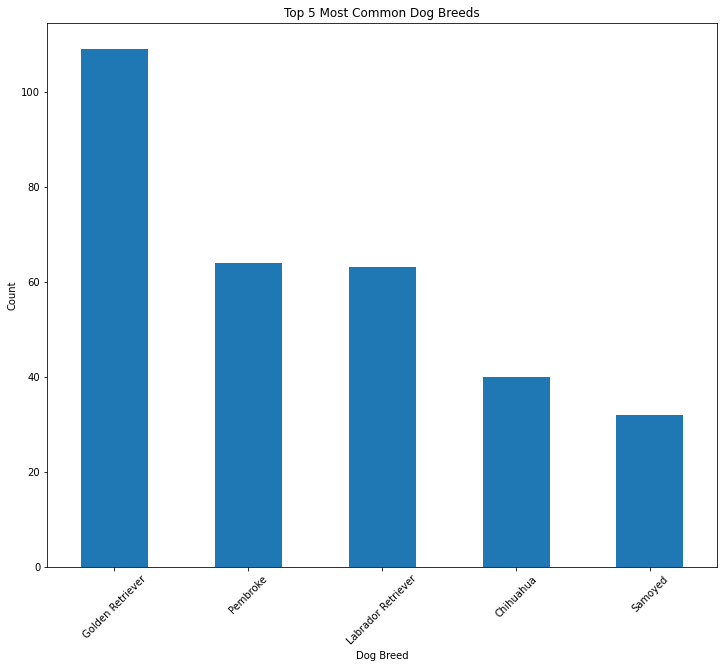

In [105]:
plt.figure(figsize=(12, 10))
breeds_plot = new_df.breed.value_counts().head(5).plot(kind='bar', title = 'Top 5 Most Common Dog Breeds')
breeds_plot.set_xlabel('Dog Breed')
breeds_plot.set_ylabel('Count')
breeds_plot.set_xticklabels(['Golden Retriever', 'Pembroke', 'Labrador Retriever', 'Chihuahua', 'Samoyed'], rotation=45);

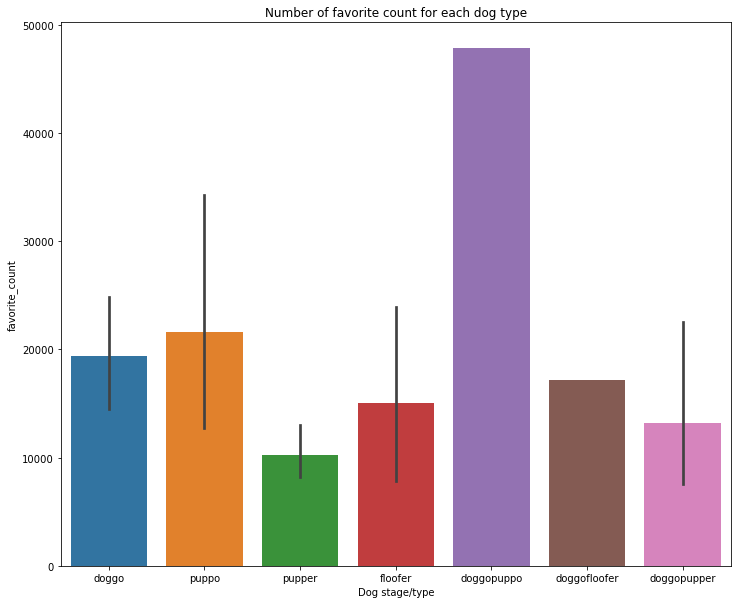

In [106]:
plt.figure(figsize=(12, 10))
sns.barplot(x=new_df['dog_stage'], y=new_df['favorite_count'])
plt.title('Number of favorite count for each dog type')
plt.xlabel('Dog stage/type');

In [125]:
new_df[new_df['dog_stage'] == 'doggopuppo']

,tweet_id,full_text,name,retweet_count,favorite_count,source,normalized_numerator,normalized_denominator,img_num,breed,expanded_urls,jpg_url,dog_stage
146,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,None,19196,47844,Twitter for iPhone,13.0,10.0,1,Flat-Coated Retriever,https://twitter.com/dog_rates/status/855851453814013952/photo/1,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,doggopuppo


In [126]:
Image('https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg')

URLError: <urlopen error EOF occurred in violation of protocol (_ssl.c:1129)>

In [112]:
new_df.dog_stage.value_counts()

pupper          109
doggo           63 
puppo           22 
doggopupper     8  
floofer         6  
doggopuppo      1  
doggofloofer    1  
Name: dog_stage, dtype: int64

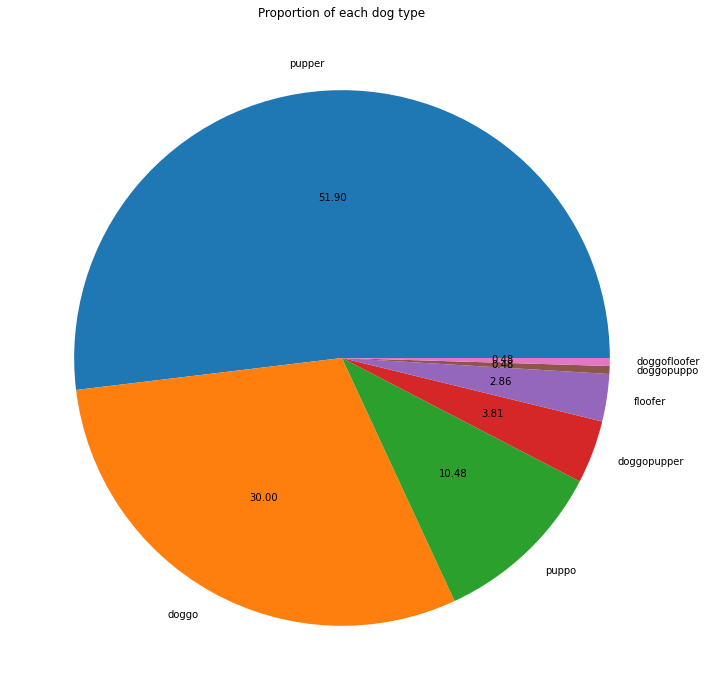

In [124]:
plt.figure(figsize=(12, 16))
plt.pie(new_df['dog_stage'].value_counts(), labels=['pupper', 'doggo', 'puppo', 'doggopupper', 'floofer', 'doggopuppo', 'doggofloofer'], autopct='%.2f')
plt.title('Proportion of each dog type');

Samoyed


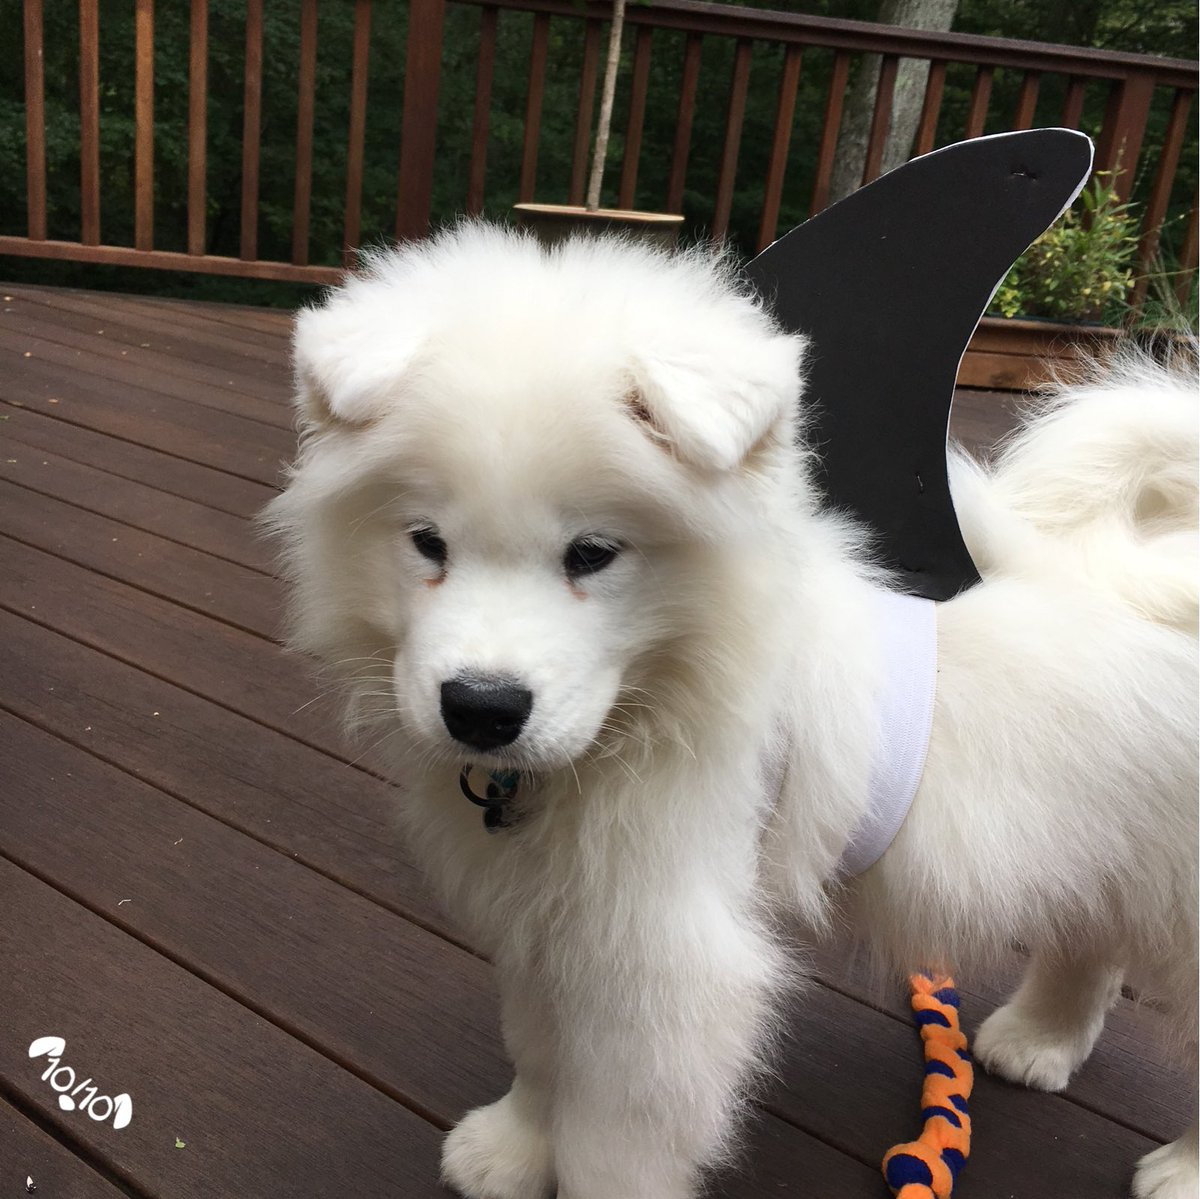

In [107]:
print(new_df['breed'][10])
Image(new_df['jpg_url'][10])

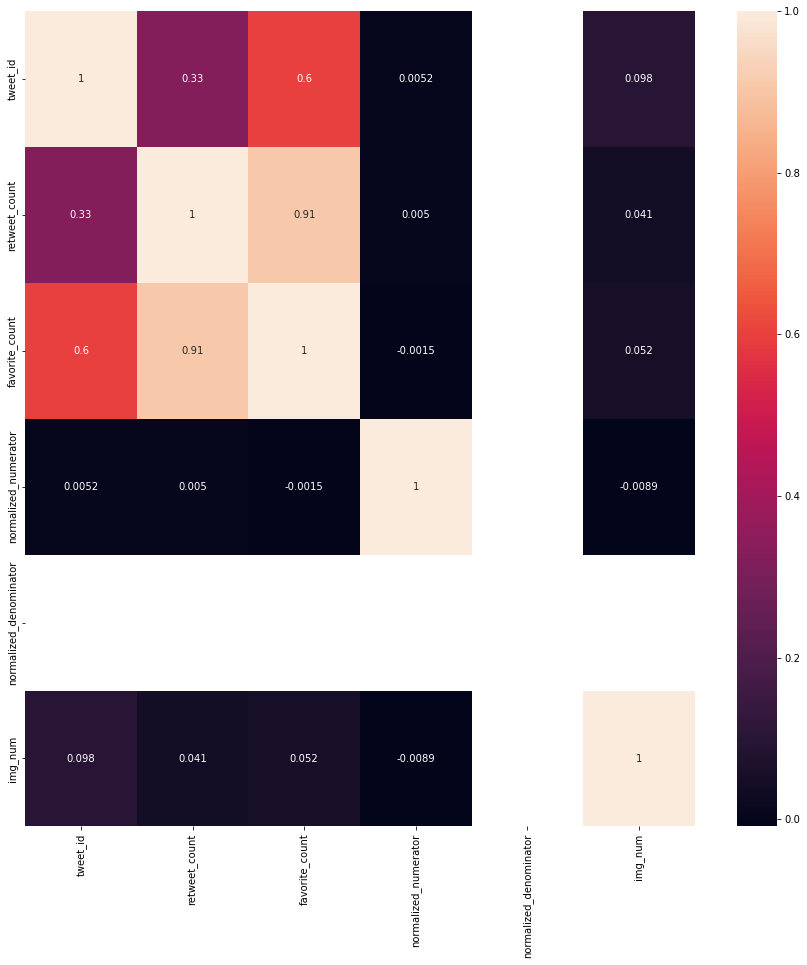

In [108]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(new_df.corr(),annot=True, ax=ax);

# <p style="text-align: center;">The End!</p>